In [1]:
%%bash
pip install --upgrade pip
pip install langchain

In [2]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

In [5]:
%%bash 
python --version
python3.9 --version
pip install -U langchain-openai



Python 3.9.21


Python 3.9.21
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 kB 2.4 MB/s eta 0:00:00-:--:--
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


此处3.6版本的python不行，
docker拉取的镜像很离谱，一直安装不了python
索性自己编译安装了一个python3.9
https://zhuanlan.zhihu.com/p/343237962

In [19]:
import getpass
import os

# if not os.environ.get("OPENAI_API_KEY"):
os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")
  # os.environ["OPENAI_API_KEY"] = 
from langchain.chat_models import init_chat_model

model = init_chat_model("gpt-3.5-turbo", model_provider="openai")
model.invoke("Hello, world!")



AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: adf. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}


感谢师兄的openai的key


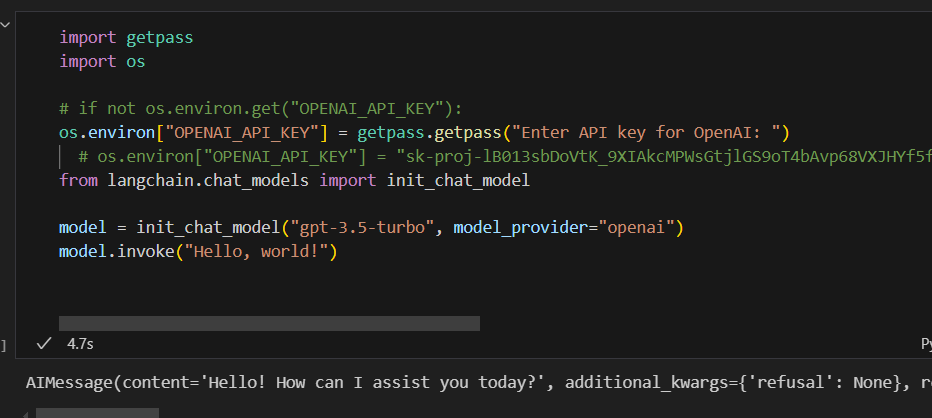


In [12]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
SystemMessage("Translate the following from English into Italian"),
HumanMessage("hi!"),
]

model.invoke(messages)

AIMessage(content='Ciao!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 4, 'prompt_tokens': 20, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-1c4585f9-1417-47c5-a562-5d2d94771bd7-0', usage_metadata={'input_tokens': 20, 'output_tokens': 4, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [13]:
model.invoke("Hello")

model.invoke([{"role": "user", "content": "Hello"}])

model.invoke([HumanMessage("Hello")])

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b4974c56-ab6b-4bcb-82d7-13a15235ffef-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## 什么是 Streaming？

Streaming 是指将模型的输出分成多个小块（例如单个 token 或一行文本），逐步返回给用户，而不是等待整个响应生成后再一次性返回。这种方式可以：

提高响应速度：用户可以立即看到部分结果，而不必等待整个响应完成。

节省内存：逐步处理输出，避免一次性加载大量数据。

增强交互性：适用于实时聊天、动态更新 UI 等场景。

In [14]:
for token in model.stream(messages):
    print(token.content, end="|")

|C|iao|!||

ok，事实证明全部跑通了

In [16]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following from English into {language}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
    
)

prompt = prompt_template.invoke({"language": "Italian", "text": "hi!"})

prompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following from English into Italian', additional_kwargs={}, response_metadata={}), HumanMessage(content='hi!', additional_kwargs={}, response_metadata={})])

In [17]:
prompt.to_messages()

[SystemMessage(content='Translate the following from English into Italian', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='hi!', additional_kwargs={}, response_metadata={})]

In [18]:
response = model.invoke(prompt)
print(response.content)

Ciao!
